In [2]:
pip install --upgrade esda libpysal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 384.2 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: esda
    Found existing installation: esda 2.4.3
    Uninstalling esda-2.4.3:
      Successfully uninstalled esda-2.4.3
Note: you may need to restart the kernel to use updated packages.


In [6]:
import geopandas as gpd
from libpysal import weights
from esda.moran import Moran
import matplotlib.pyplot as plt

/tmp/ipykernel_19250/2908330898.py:8: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(service_area)


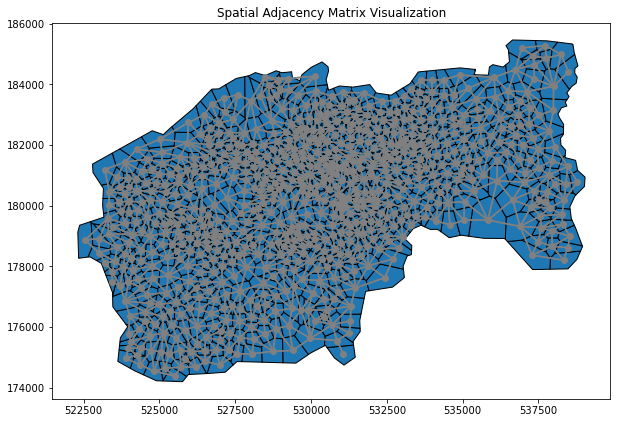

Global Moran's I: 0.2618358406825948
p value: 0.001
Global spatial autocorrelation is statistically significant.


In [13]:
# 1. read geojson of theisson polygon of each bike station, which is the statistical unit of this research
service_area = gpd.read_file('santander_service_area_theisson.geojson')

# 2. Build spatial adjacency matrix
# In a Queen adjacency matrix, two spatial units are considered adjacent if they share a boundary or vertex. In other words, if the boundary or vertex of two spatial units are adjacent, then they are considered Queen neighbors.
# The Queen adjacency matrix is applicable to spatial units of any shape because it considers the shared relationships of boundaries and vertices.

w = weights.Queen.from_dataframe(service_area)

# Visualize the spatial adjacency matrix
fig, ax = plt.subplots(figsize=(10, 10))
service_area.plot(ax=ax, edgecolor='black')
w.plot(service_area, ax=ax, color='gray')  # Remove alpha parameter here
plt.title('Spatial Adjacency Matrix Visualization')
plt.show()


# 3. Calculate Global Moran's I Value
#  'inbound_counts' is monthly accumulated inbound flows of each Santander bike station
moran = Moran(service_area['inbound_counts'], w)
print("Global Moran's I:", moran.I)

# 输出p值
print("p value:", moran.p_sim)

# Interpretation of results
if moran.p_sim < 0.05:
    print("Global spatial autocorrelation is statistically significant.")
else:
    print("No statistically significant global spatial autocorrelation observed.")

The Moran's I index of 0.26 indicates a certain degree of global spatial autocorrelation of Santander Bike station inbound flows. The Moran's I index ranges from -1 to 1, where:<br>
- A positive Moran's I value (close to 1) indicates that similar values of spatial units are clustered together, suggesting positive spatial autocorrelation.
- A negative Moran's I value (close to -1) indicates that similar values of spatial units are dispersed, suggesting negative spatial autocorrelation.
- When Moran's I is close to 0, it suggests no significant spatial relationship among similar values of spatial units.
<br><br>
Therefore, a Moran's I value of 0.26 indicates a certain degree of positive spatial autocorrelation, meaning that similar values among spatial units exhibit a tendency to cluster together.

In [ ]:
## Local Moran's I

/tmp/ipykernel_19250/2847964079.py:13: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(service_area)


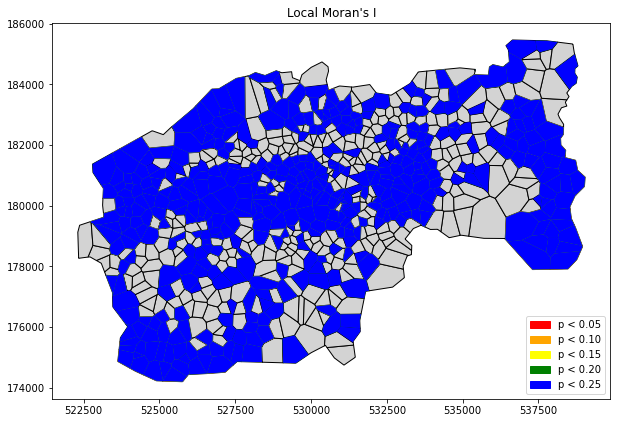

In [25]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from libpysal import weights
from esda.moran import Moran_Local
import matplotlib.patches as mpatches  # 导入 matplotlib.patches 模块

# 1. 读取地理空间数据
service_area = gpd.read_file('santander_service_area_theisson.geojson')

# 2. 构建空间邻接矩阵
w = weights.Queen.from_dataframe(service_area)

# 3. 计算局部莫兰指数
moran_loc = Moran_Local(service_area['inbound_counts'], w)

# 4. 可视化局部莫兰指数
fig, ax = plt.subplots(figsize=(10, 10))

# 设置背景为灰色
service_area.plot(ax=ax, color='lightgrey', edgecolor='black')

# 根据局部莫兰指数的分类来给出不同的颜色
colors = ['red', 'orange', 'yellow', 'green', 'blue']
for i in range(1, 6):
    service_area[moran_loc.p_sim < 0.05*i].plot(ax=ax, color=colors[i-1], label=f'p < {0.05*i:.2f}')

# 创建图例
legend_handles = [mpatches.Patch(color=colors[i], label=f'p < {0.05*(i+1):.2f}') for i in range(5)]
ax.legend(handles=legend_handles, loc='lower right')

plt.title("Local Moran's I")
plt.show()
